In [1]:
from processor import Processor
from splitter import DataSplitter
from mlmodel import MLModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



In [22]:
# load the datas
Processor = Processor(filepath="../data/balanced_data.csv")
Processor.load_data()
Processor.show_features()

TypeError: 'Processor' object is not callable

In [23]:
# columns to drop

columns_to_drop = ['Flow ID', 'SrcIP', 'DstIP', 'External_src', 'External_dst', 'Conn_state', 'Segment_src','Segment_dst', 'Expoid_src', 'Expoid_dst', 'mTimestampStart', 'mTimestampLast']

columns_to_drop_y = ['FIN Flag Cnt', 'FWD Init Win Bytes', 'RST Flag Cnt', 'SYN Flag Cnt', 'Fwd Packet Length Std', 'Fwd Packet Length Max', 'Bwd Packet Length Std', 'Bwd Packet Length Max', 'Packet Length Max', 'L3/L4 Protocol']

In [24]:
Processor.drop_features(columns_to_drop = columns_to_drop)
Processor.show_features()

Features in the dataset:
1. SrcPort
2. DstPort
3. Protocol
4. Flow Duration
5. Flow Bytes/s
6. Flow Packets/s
7. Tot Fwd Pkts
8. Tot Bwd Pkts
9. Total Length of Fwd Packet
10. Total Length of Bwd Packet
11. Fwd Packet Length Min
12. Fwd Packet Length Mean
13. Bwd Packet Length Min
14. Bwd Packet Length Mean
15. Flow IAT Mean
16. Flow IAT Min
17. Flow IAT Max
18. Fwd IAT Min
19. Bwd IAT Min
20. Bwd IAT Mean
21. Bwd IAT Std
22. Fwd PSH flags
23. Bwd PSH flags
24. Fwd URG flags
25. Bwd URG flags
26. Fwd Header Length
27. Packet Length Mean
28. Packet Length Variance
29. PSH Flag Cnt
30. ACK Flag Cnt
31. URG Flag Cnt
32. CWR Flag Cnt
33. Down/Up Ratio
34. Fwd Bytes/Bulk Avg
35. Fwd Packet/Bulk Avg
36. Fwd Bulk Rate Avg
37. Bwd Bytes/Bulk Avg
38. Bwd Packet/Bulk Avg
39. Bwd Bulk Rate Avg
40. Subflow Fwd Packets
41. Subflow Fwd Bytes
42. Subflow Bwd Packets
43. Bwd Init Win Bytes
44. Fwd Act Data Pkts
45. Fwd Seg Size Min
46. Active Min
47. Active Mean
48. Active Max
49. Active Std
50. Idle 

In [25]:
Processor.drop_features(columns_to_drop = columns_to_drop_y)
Processor.show_features()

Features in the dataset:
1. SrcPort
2. DstPort
3. Protocol
4. Flow Duration
5. Flow Bytes/s
6. Flow Packets/s
7. Tot Fwd Pkts
8. Tot Bwd Pkts
9. Total Length of Fwd Packet
10. Total Length of Bwd Packet
11. Fwd Packet Length Min
12. Fwd Packet Length Mean
13. Bwd Packet Length Min
14. Bwd Packet Length Mean
15. Flow IAT Mean
16. Flow IAT Min
17. Flow IAT Max
18. Fwd IAT Min
19. Bwd IAT Min
20. Bwd IAT Mean
21. Bwd IAT Std
22. Fwd PSH flags
23. Bwd PSH flags
24. Fwd URG flags
25. Bwd URG flags
26. Fwd Header Length
27. Packet Length Mean
28. Packet Length Variance
29. PSH Flag Cnt
30. ACK Flag Cnt
31. URG Flag Cnt
32. CWR Flag Cnt
33. Down/Up Ratio
34. Fwd Bytes/Bulk Avg
35. Fwd Packet/Bulk Avg
36. Fwd Bulk Rate Avg
37. Bwd Bytes/Bulk Avg
38. Bwd Packet/Bulk Avg
39. Bwd Bulk Rate Avg
40. Subflow Fwd Packets
41. Subflow Fwd Bytes
42. Subflow Bwd Packets
43. Bwd Init Win Bytes
44. Fwd Act Data Pkts
45. Fwd Seg Size Min
46. Active Min
47. Active Mean
48. Active Max
49. Active Std
50. Idle 

In [26]:
# extract the target
Processor.extract_target(target_column='Label')
print(Processor.y.value_counts())
Processor.show_features()

Error: Column 'Label' not found in the dataset.
Label
0    909248
1    861946
Name: count, dtype: int64
Features in the dataset:
1. SrcPort
2. DstPort
3. Protocol
4. Flow Duration
5. Flow Bytes/s
6. Flow Packets/s
7. Tot Fwd Pkts
8. Tot Bwd Pkts
9. Total Length of Fwd Packet
10. Total Length of Bwd Packet
11. Fwd Packet Length Min
12. Fwd Packet Length Mean
13. Bwd Packet Length Min
14. Bwd Packet Length Mean
15. Flow IAT Mean
16. Flow IAT Min
17. Flow IAT Max
18. Fwd IAT Min
19. Bwd IAT Min
20. Bwd IAT Mean
21. Bwd IAT Std
22. Fwd PSH flags
23. Bwd PSH flags
24. Fwd URG flags
25. Bwd URG flags
26. Fwd Header Length
27. Packet Length Mean
28. Packet Length Variance
29. PSH Flag Cnt
30. ACK Flag Cnt
31. URG Flag Cnt
32. CWR Flag Cnt
33. Down/Up Ratio
34. Fwd Bytes/Bulk Avg
35. Fwd Packet/Bulk Avg
36. Fwd Bulk Rate Avg
37. Bwd Bytes/Bulk Avg
38. Bwd Packet/Bulk Avg
39. Bwd Bulk Rate Avg
40. Subflow Fwd Packets
41. Subflow Fwd Bytes
42. Subflow Bwd Packets
43. Bwd Init Win Bytes
44. Fwd A

In [27]:
# solve and encode categorical datas
Processor.detect_categorical(handle_nan="drop")
Processor.encode_categorical(method="label")

No categorical features detected.
No categorical features to encode.


In [28]:
# drop duplicated lines in the code
Processor.handle_duplicates()
print(Processor.y.value_counts())

No duplicate rows found in the dataset.
Label
0    909248
1    861946
Name: count, dtype: int64


In [29]:
# detect numerical issues and treat the datas and drop them
num_issue_features = Processor.detect_missing_numerical()
Processor.handle_missing_values(num_issue_features, method="drop", custom_value=None)
print(Processor.y.value_counts())

Missing values for numerical features:
No missing values detected in numerical features.
No features provided for handling missing values.
Label
0    909248
1    861946
Name: count, dtype: int64


In [33]:
# study the features that are hoghly correelated to the target :

correlated_features_to_target = Processor.find_correlated_features(threshold=0.7)
print(correlated_features_to_target)

Features highly correlated with the target (threshold: 0.7):
[]


In [34]:
import matplotlib.pyplot as plt
correlated_features, fig = Processor.study_correlation(threshold=0.95)
Processor.drop_highly_correlated(correlated_features=correlated_features)
Processor.show_features()


ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x800 with 0 Axes>

In [35]:
# rescale the data

Processor.rescale_data(method="normalise")
Processor.summarize_feature_distribution(top_categories=1)

Invalid method 'normalise'. Use 'standardize' or 'normalize'.
Summary of Feature Distribution:

Numerical Features:
  - SrcPort:
    Mean: 50727.99, Std: 13434.30, Min: 0.00, Max: 65535.00
  - DstPort:
    Mean: 466.09, Std: 3428.44, Min: 0.00, Max: 65520.00
  - Protocol:
    Mean: 10.59, Std: 7.82, Min: 1.00, Max: 132.00
  - Flow Duration:
    Mean: 3560526.39, Std: 16369738.56, Min: 1.00, Max: 119999999.00
  - Flow Bytes/s:
    Mean: 746488.08, Std: 8225827.34, Min: 0.00, Max: 1518000000.00
  - Flow Packets/s:
    Mean: 8120.37, Std: 88277.36, Min: 0.02, Max: 4000000.00
  - Tot Fwd Pkts:
    Mean: 17.64, Std: 82.91, Min: 1.00, Max: 79306.00
  - Tot Bwd Pkts:
    Mean: 7.92, Std: 59.37, Min: 0.00, Max: 48299.00
  - Total Length of Fwd Packet:
    Mean: 1702.83, Std: 8194.75, Min: 0.00, Max: 4410230.00
  - Total Length of Bwd Packet:
    Mean: 2243.56, Std: 46846.36, Min: 0.00, Max: 40558556.00
  - Fwd Packet Length Min:
    Mean: 28.97, Std: 21.78, Min: 0.00, Max: 1240.00
  - Fwd Pack

{'numerical': {'SrcPort': {'mean': 50727.992431094506,
   'std': 13434.296366772722,
   'min': 0.0,
   'max': 65535.0},
  'DstPort': {'mean': 466.09242352898667,
   'std': 3428.4385649610667,
   'min': 0.0,
   'max': 65520.0},
  'Protocol': {'mean': 10.589778985249499,
   'std': 7.8227001638943685,
   'min': 1.0,
   'max': 132.0},
  'Flow Duration': {'mean': 3560526.3932782067,
   'std': 16369738.561610283,
   'min': 1.0,
   'max': 119999999.0},
  'Flow Bytes/s': {'mean': 746488.0833554476,
   'std': 8225827.342644974,
   'min': 0.0,
   'max': 1518000000.0},
  'Flow Packets/s': {'mean': 8120.373806945003,
   'std': 88277.36242200453,
   'min': 0.0242425461897778,
   'max': 4000000.0},
  'Tot Fwd Pkts': {'mean': 17.643200010840147,
   'std': 82.91298339215028,
   'min': 1.0,
   'max': 79306.0},
  'Tot Bwd Pkts': {'mean': 7.915484131043804,
   'std': 59.37472110895401,
   'min': 0.0,
   'max': 48299.0},
  'Total Length of Fwd Packet': {'mean': 1702.8258508102444,
   'std': 8194.745548331

In [36]:
    # Initialize DataSplitter
splitter = DataSplitter()
splitter.set_data(Processor.data, Processor.y)
splitter.random_split(test_size=0.2)

Data set successfully:
- Features: (1771194, 52)
- Target: (1771194,)
Random split completed:
- Train: 1416955
- Test: 354239


In [37]:
"""splitter = DataSplitter()
splitter.load_from_csv(X_path = "../data/test_1/processed_data.csv",y_path = "../data/test_1/processed_target.csv")
splitter.random_split(test_size=0.2)"""

'splitter = DataSplitter()\nsplitter.load_from_csv(X_path = "../data/test_1/processed_data.csv",y_path = "../data/test_1/processed_target.csv")\nsplitter.random_split(test_size=0.2)'

In [38]:
from xgboost import XGBClassifier, XGBRegressor

model = XGBClassifier(n_estimators=150, max_depth=8, learning_rate=0.5, random_state=10)


In [39]:
X_train, y_train = splitter.splits["train"]
X_test, y_test = splitter.splits["test"]

In [40]:
print(X_train.shape)
print(y_train.shape)


(1416955, 52)
(1416955,)


In [42]:

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [43]:
y_pred = model.predict(X_test)

In [44]:
print(y_pred)

[0 0 0 ... 0 0 1]


In [45]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9998842589325286
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    181792
           1       1.00      1.00      1.00    172447

    accuracy                           1.00    354239
   macro avg       1.00      1.00      1.00    354239
weighted avg       1.00      1.00      1.00    354239



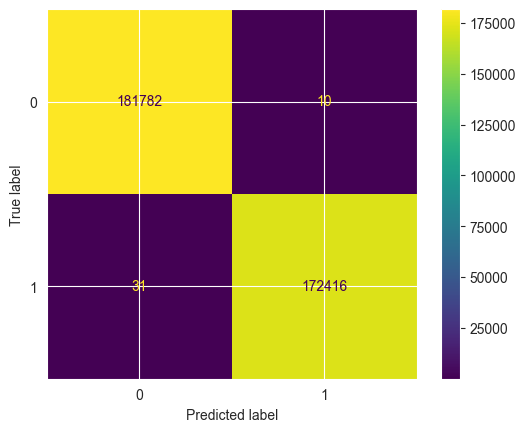

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()  # Change the colormap as desired


[1.7869748e-08 1.6326617e-07 3.6096992e-08 ... 1.7797671e-08 1.9615527e-06
 1.0000000e+00]


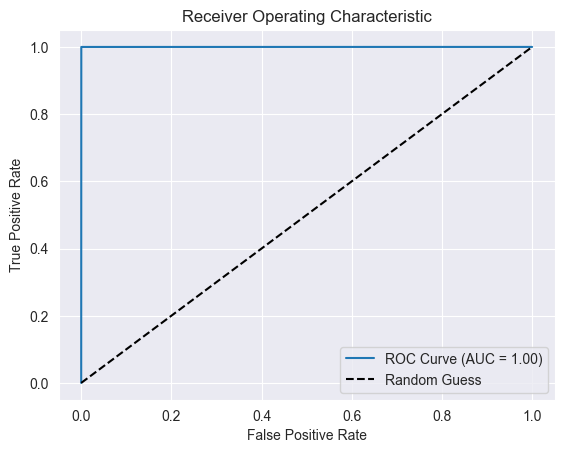

In [47]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities (for ROC curve, probabilities are required)
y_pred_proba = model.predict_proba(X_test)[:, 1]
print(y_pred_proba)
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [48]:
# let's test another ml algorithm
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()



In [49]:
leakage_info = splitter.check_data_leakage(X_train, X_test)
print("Leakage Info:", leakage_info)

Leakage Info: {'overlap_in_features': 0}
